In [1]:
import pandas as pd
from google.colab import files

file = files.upload()
data = pd.read_csv('twitter.csv')

Saving twitter.csv to twitter.csv


**EDA (Exploratory Data Analysis)**

In [2]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
data.shape

(74681, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data.columns = ['Tweet_Id','Topic','Sentiment','Text']

In [6]:
data.isnull().sum()

,0
Tweet_Id,0
Topic,0
Sentiment,0
Text,686


In [7]:
print("Number of Rows and Columns:",data.shape)
print("The Amount of Missing Values in the Text Column:", data['Text'].isna().sum())

Number of Rows and Columns: (74681, 4)
The Amount of Missing Values in the Text Column: 686


**Handling Missing Values and Duplicates**

In [8]:
data = data.dropna(subset = ['Text']).reset_index(drop=True)

In [9]:
data = data.drop_duplicates(subset = ['Text']).reset_index(drop = True)

In [10]:
print("Final Data Condition After Handling Missing Values and Handling Duplicates:",
      data.shape)

Final Data Condition After Handling Missing Values and Handling Duplicates: (69490, 4)


In [11]:
data.head()

,Tweet_Id,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Data Visualization**

Sentiment
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


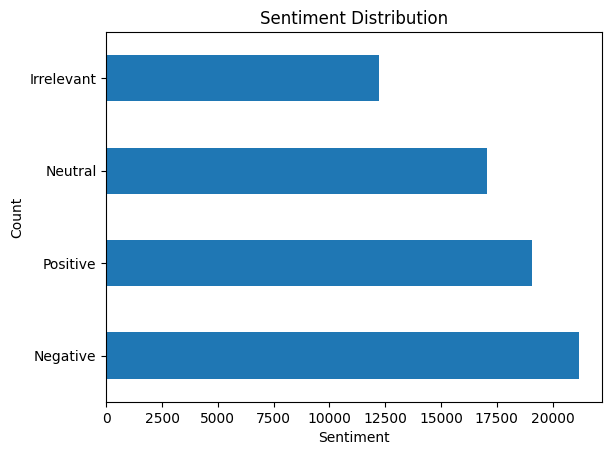

In [12]:
import matplotlib.pyplot as plt

SentimentCount  = data["Sentiment"].value_counts()
print(SentimentCount)

plt.figure()
SentimentCount.plot(kind='barh')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

count    69490.000000
mean        19.944481
std         14.247607
min          0.000000
25%          9.000000
50%         16.000000
75%         28.000000
max        198.000000
Name: Text_Length, dtype: float64


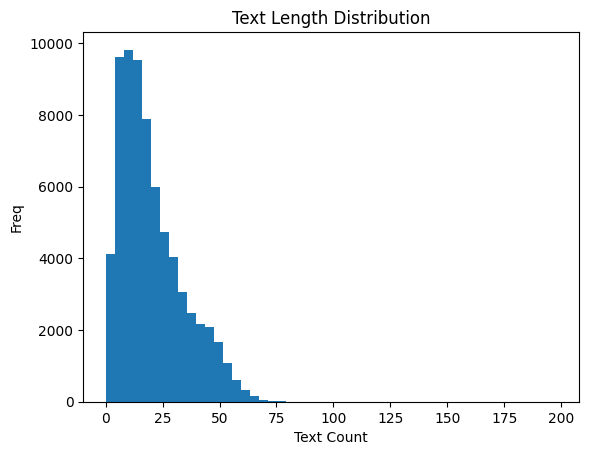

In [13]:
data['Text_Length'] = data['Text'].astype(str).apply(lambda x : len(x.split(

)))

print(data['Text_Length'].describe())

plt.figure()
plt.hist(data['Text_Length'], bins = 50)
plt.title("Text Length Distribution")
plt.xlabel("Text Count")
plt.ylabel('Freq')
plt.show()

<Figure size 640x480 with 0 Axes>

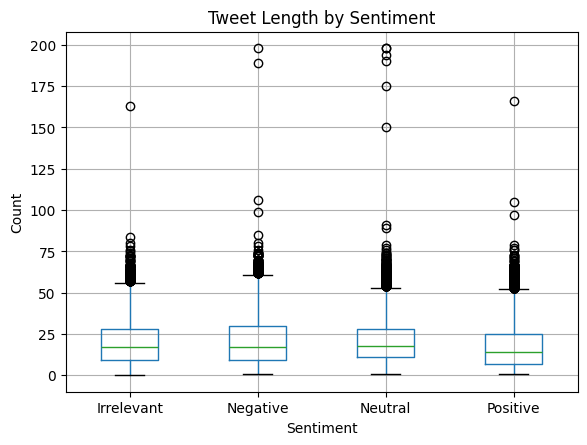

In [14]:
plt.figure()
data.boxplot(column='Text_Length',by = 'Sentiment')
plt.title("Tweet Length by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Data Cleaning**

In [15]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 9.5 MB/s eta 0:00:00


In [158]:
import re
import pandas as pd
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

negation_words = {
    "no","not","nor","never","cannot","can't","won't",
    "don't","didn't","isn't","aren't","wasn't","weren't",
    "shouldn't","wouldn't","couldn't", "haven't"
}

stop_words = stop_words - negation_words

lemmatizer = WordNetLemmatizer()

def normalize_contractions(text):
    text = re.sub(r"won\s*[’']?\s*t", "will not", text)
    text = re.sub(r"can\s*[’']?\s*t", "cannot", text)
    text = re.sub(r"haven\s*[’']?\s*t", "have not", text)
    text = re.sub(r"hasn\s*[’']?\s*t", "has not", text)
    text = re.sub(r"hadn\s*[’']?\s*t", "had not", text)
    text = re.sub(r"don\s*[’']?\s*t", "do not", text)
    text = re.sub(r"didn\s*[’']?\s*t", "did not", text)
    text = re.sub(r"isn\s*[’']?\s*t", "is not", text)
    text = re.sub(r"aren\s*[’']?\s*t", "are not", text)
    text = re.sub(r"wasn\s*[’']?\s*t", "was not", text)
    text = re.sub(r"weren\s*[’']?\s*t", "were not", text)
    text = re.sub(r"shouldn\s*[’']?\s*t", "should not", text)
    text = re.sub(r"wouldn\s*[’']?\s*t", "would not", text)
    text = re.sub(r"couldn\s*[’']?\s*t", "could not", text)
    return text

def normalize_spaced_urls(text):
    text = re.sub(r"https?\s*:\s*/\s*/", "https://", text)

    text = re.sub(
        r"\b(i\s*f\s*t|with|t|bit)\s*\.\s*(tt|co|ly)\b(\s*/\s*\w+)*",
        " ",
        text
    )

    text = re.sub(r"\b(?=[a-z0-9]*\d)[a-z0-9]{5,8}\b", " ", text)

    text = re.sub(r"\s*\.\s*", ".", text)
    text = re.sub(r"\s*/\s*", "/", text)
    text = re.sub(r"\s*\?\s*", "?", text)
    text = re.sub(r"\s*=\s*", "=", text)

    return text

def handle_negation(text):
    text = re.sub(r"\bnot\s+bad\b", "not_bad", text)
    text = re.sub(r"\bnot\s+good\b", "not_good", text)
    text = re.sub(r"\bnot\s+great\b", "not_great", text)
    return text



def clean_tweet(text):
    text = text.lower().strip()

    text = normalize_spaced_urls(text)
    text = normalize_contractions(text)
    text = handle_negation(text)


    if (
        re.search(r"https?://|www\.", text) or
        re.search(r"\b(t\.co|twib|buff|zpr)\b", text) or
        re.search(r"\bvia\s", text) or
        re.search(r"watch\?v=", text)
    ):
        if len(text.split()) >= 6:
            return ""


    if re.search(r"\b(dlvr|from it|rmtrgf)\b", text):
        return ""


    if re.fullmatch(r"[.\s]*\w+\.(tv|com|net|org|ly|io)/?\S*", text):
        return ""


    if len(re.findall(r"[a-z]", text)) < 5:
        return ""


    text = re.sub(r"\[unk\]|<unk>", " ", text)

    text = re.sub(
        r"(https?://\S+|www\.\S+|twitch\.tv/\S+|"
        r"pic\.twitter\.com\s*/?\s*\S+|"
        r"\b\w+\.(com|net|org|it|ly|io)\s*/?\s*\S+)",
        " ",
        text
    )

    text = re.sub(r"@\s*\w+", " ", text)
    text = re.sub(r"#(\w+)", r"\1", text)

    text = emoji.demojize(text, delimiters=(" ", " "))

    text = re.sub(r"(.)\1{2,}", r"\1\1", text)
    text = re.sub(r"\b[b-df-hj-np-tv-z]{5,}\b", " ", text)

    text = re.sub(r"[^a-z0-9_\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = [
    lemmatizer.lemmatize(w)
    for w in text.split()
    if w not in stop_words and (len(w) > 2 or w in negation_words)
    ]


    return " ".join(tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [159]:
data["Clean_Text"] = data['Text'].apply(clean_tweet)

In [160]:
(data["Clean_Text"].str.strip() == "").sum()

np.int64(0)

In [161]:
data = data[data["Clean_Text"].str.strip() != ""]
data = data.reset_index(drop=True)

In [162]:
data[["Text","Clean_Text"]].tail(1000)

,Text,Clean_Text
63990,. nvidia.com / en-us / freec / keyn.... intere...,interaction social activity braindates dinner ...
63991,. nvidia.com/en-us/gtc/keyn…. Personal interac...,interaction social activity braindates dinner ...
63992,. nvidia. org com / en - us / gtc / keyn …. co...,gtc keyn com interesting interaction social ac...
63993,. nvidia.com/en-us/gtc/keyn.... artist life/so...,life social life braindates interacting strang...
63994,New Nvidia RTX 3080 upgrade just leaked — and ...,new nvidia rtx 3080 upgrade leaked could crush...
...,...,...
64985,Just realized that the Windows partition of my...,realized window partition mac like year behind...
64986,Just realized that my Mac window partition is ...,realized mac window partition year behind nvid...
64987,Just realized the windows partition of my Mac ...,realized window partition mac year behind nvid...
64988,Just realized between the windows partition of...,realized window partition mac like year behind...


**Encode**

In [163]:
label = {
    "Negative": 0,
    "Positive": 1,
    "Neutral": 2,
    "Irrelevant" : 3
}

data["Label"] = data["Sentiment"].map(label)


In [164]:
data[["Sentiment","Label"]].head(100)

,Sentiment,Label
0,Positive,1
1,Positive,1
2,Positive,1
3,Positive,1
4,Positive,1
...,...,...
95,Negative,0
96,Positive,1
97,Positive,1
98,Positive,1


**Modelling**

In [165]:
from sklearn.model_selection import train_test_split

X = data.Clean_Text
y = data.Label

TrainX,ValX,TrainY,ValY = train_test_split(X,y, test_size=0.2,
                                           random_state=42,
                                           stratify=y)

len(TrainX),len(ValX)

(51992, 12998)

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 60000,
                        ngram_range=(1,2))

TrainXTf = tfidf.fit_transform(TrainX)
ValXTf = tfidf.transform(ValX)

TrainXTf.shape, ValXTf.shape



((51992, 60000), (12998, 60000))

**Logistic Regression**

In [167]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter = 1000,
    solver ='saga',
    class_weight = 'balanced'
)

model.fit(TrainXTf, TrainY)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

In [168]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(ValXTf)

print("Model Accuration:", accuracy_score(ValY,y_pred))
print(classification_report(ValY,y_pred))

Model Accuration: 0.8495153100476996
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4082
           1       0.86      0.84      0.85      3626
           2       0.84      0.83      0.83      2974
           3       0.81      0.84      0.83      2316

    accuracy                           0.85     12998
   macro avg       0.85      0.85      0.85     12998
weighted avg       0.85      0.85      0.85     12998



**Linear SVC**

In [169]:
from sklearn.svm import LinearSVC

modelSVC = LinearSVC(class_weight =
                  'balanced')

modelSVC.fit(TrainXTf,TrainY)

LinearSVC(class_weight='balanced')

In [170]:
y_predSVC = modelSVC.predict(ValXTf)

print("Model SVC Accuration:", accuracy_score(ValY,y_predSVC))
print(classification_report(ValY,y_predSVC))

Model SVC Accuration: 0.909216802585013
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4082
           1       0.90      0.91      0.91      3626
           2       0.92      0.89      0.91      2974
           3       0.90      0.88      0.89      2316

    accuracy                           0.91     12998
   macro avg       0.91      0.90      0.91     12998
weighted avg       0.91      0.91      0.91     12998



In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {
    "C": [0.1,0.5,1,2,5]
}

svc = LinearSVC(
    class_weight = "balanced"
)

grid = GridSearchCV(
    svc,
    param_grid,
    scoring = "f1_macro",
    cv = 5,
    n_jobs = -1,
    verbose=1
)

grid.fit(TrainXTf,TrainY)


print("Best C:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C: {'C': 2}
Best CV F1: 0.9178410503356618


In [172]:
final_model = LinearSVC(
    C = 2,
    class_weight = 'balanced',
    dual = False,
    max_iter = 5000
)

final_model.fit(TrainXTf,TrainY)

LinearSVC(C=2, class_weight='balanced', dual=False, max_iter=5000)

In [173]:
y_predFinal = final_model.predict(ValXTf)

print("Accuracy Model:", accuracy_score(ValY, y_predFinal))
print(classification_report(ValY, y_predFinal))

Accuracy Model: 0.9098322818895215
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4082
           1       0.91      0.91      0.91      3626
           2       0.91      0.90      0.91      2974
           3       0.90      0.88      0.89      2316

    accuracy                           0.91     12998
   macro avg       0.91      0.91      0.91     12998
weighted avg       0.91      0.91      0.91     12998



Although the cross-validation score was slightly higher than the validation performance, the gap remained within an acceptable range, indicating good generalization and no signs of overfitting.

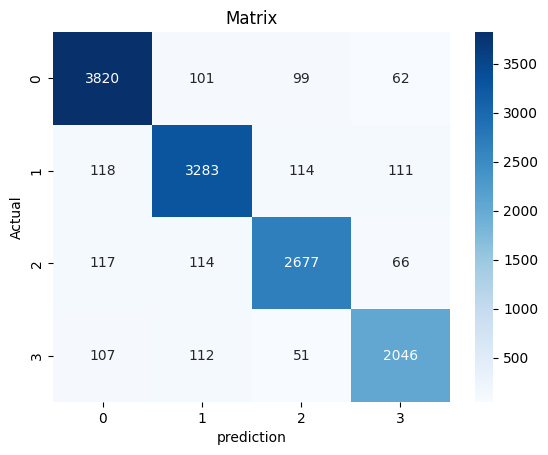

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(ValY,y_predFinal )

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("prediction")
plt.ylabel("Actual")
plt.title("Matrix")
plt.show()

**Model Inference**

In [175]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(
    {
        "tfidf": tfidf,
        "model": final_model
    },
    "models/model_final.pkl"
)


['models/model_final.pkl']

In [228]:
import numpy as np

LABEL = {
    0: "negative",
    1: "positive",
    2: "neutral",
    3: "irrelevant"
}

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

def predict_text(text):
    clean = clean_tweet(text)

    if clean.strip() == "" or len(clean.split()) < 2:
        return {
            "prediction": "irrelevant"
        }

    v = tfidf.transform([clean])

    margins = model.decision_function(v)[0]

    probs = softmax(margins)

    pred_idx = np.argmax(probs)
    label = LABEL[pred_idx]
    confidence = float(probs[pred_idx])

    return {
        "prediction": label
    }


# **EXAMPLE**

**Negation Words**

In [215]:
predict_text("Not bad I think")

{'prediction': 'neutral'}

**Positive Words**

In [216]:
predict_text("Nvidia delivers excellent performance with the new GPU")

{'prediction': 'positive'}

**Neutral Words**

In [218]:
predict_text("Nvidia GPUs are commonly used for machine learning tasks")

{'prediction': 'neutral'}

**Negative Words**

In [220]:
predict_text("I regret buying this GPU, worst purchase ever")

{'prediction': 'negative'}

**Sarcasm Words**

In [224]:
predict_text("Amazing update, now my PC crashes twice as fast")

{'prediction': 'negative'}

**Irrelevant Words**

In [229]:
predict_text("RTX $)()4090")

{'prediction': 'irrelevant'}